<a href="https://colab.research.google.com/github/andrewwgordon/WMAPPowerSpectrum/blob/master/WMAP_power_spectrum_analysis_with_HealPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title
!pip install healpy
!pip install astroML

     |████████████████████████████████| 13.5MB 2.8MB/s 
     |████████████████████████████████| 102kB 2.7MB/s 
  Created wheel for astroML: filename=astroML-0.4.post1-cp36-none-any.whl size=127933 sha256=a97da2a4eabc1c9e6e3929aaaa67453ba9cd06a6d91362e6441e6f353136083e
  Stored in directory: /root/.cache/pip/wheels/2b/cd/d8/7b04f124752987263edc47a44f7d39d8e2c2b4c82474f6fd5a
Successfully built astroML



NSIDE = 512
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


/usr/local/lib/python3.6/dist-packages/healpy/fitsfunc.py:371: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  warnings.warn("No INDXSCHM keyword in header file : " "assume {}".format(schm))


NSIDE = 512
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING

NSIDE = 512
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


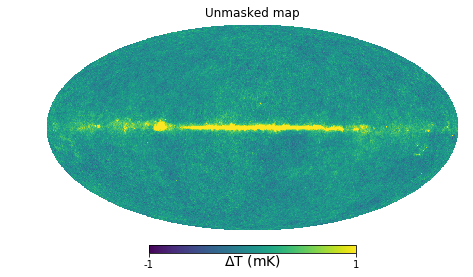

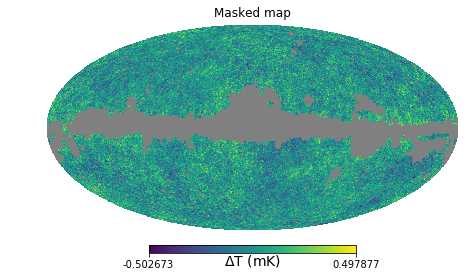

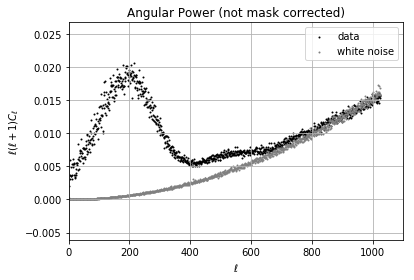

In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

# warning: due to a bug in healpy, importing it before pylab can cause
#  a segmentation fault in some circumstances.
import healpy as hp

from astroML.datasets import fetch_wmap_temperatures


#------------------------------------------------------------
# Fetch the data
wmap_unmasked = fetch_wmap_temperatures(masked=False)
wmap_masked = fetch_wmap_temperatures(masked=True)
white_noise = np.ma.asarray(np.random.normal(0, 0.062, wmap_masked.shape))

#------------------------------------------------------------
# plot the unmasked map
fig = plt.figure(1)
hp.mollview(wmap_unmasked, min=-1, max=1, title='Unmasked map',
            fig=1, unit=r'$\Delta$T (mK)')

#------------------------------------------------------------
# plot the masked map
#  filled() fills the masked regions with a null value.
fig = plt.figure(2)
hp.mollview(wmap_masked.filled(), title='Masked map',
            fig=2, unit=r'$\Delta$T (mK)')

#------------------------------------------------------------
# compute and plot the power spectrum
cl = hp.anafast(wmap_masked.filled(), lmax=1024)
ell = np.arange(len(cl))

cl_white = hp.anafast(white_noise, lmax=1024)

fig = plt.figure(3)
ax = fig.add_subplot(111)
ax.scatter(ell, ell * (ell + 1) * cl,
           s=4, c='black', lw=0,
           label='data')
ax.scatter(ell, ell * (ell + 1) * cl_white,
           s=4, c='gray', lw=0,
           label='white noise')

ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$\ell(\ell+1)C_\ell$')
ax.set_title('Angular Power (not mask corrected)')
ax.legend(loc='upper right')
ax.grid()
ax.set_xlim(0, 1100)

plt.show()

In [7]:
wmap_unmasked

array([-0.12779275, -0.08507241,  0.08297058, ...,  0.0255827 ,
        0.09494673,  0.03039758])